In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading data from .txt files to numpy arrays**

In [0]:
X=pd.read_csv('trainX.txt', delim_whitespace=True, header=None).astype(int).values
Y=pd.read_csv('trainY.txt', delim_whitespace=True, header=None).astype(int).values
Test_X=pd.read_csv('testX.txt', delim_whitespace=True, header=None).astype(int).values
Test_Y=pd.read_csv('testY.txt', delim_whitespace=True, header=None).astype(int).values

**Drew 1 input from training data to check that it loaded correctly or not**

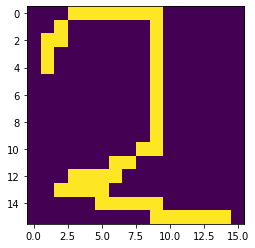

In [3]:
img1=np.reshape(X[0,:],(16,16),order='F')
plt.imshow(img1)

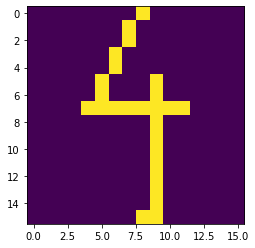

In [4]:
img2=np.reshape(X[499,:],(16,16),order='F')
plt.imshow(img2)

# **naive bayes classification algorithm**

*   **Calculating Probabilities w.r.t training data**


In [0]:
Two_Train=X[:249,:]
Four_Train=X[250:,:]
Two_1_Prob=(Two_Train.sum(axis=0)+1)/(Two_Train.shape[0]+2)
Two_0_Prob=1-Two_1_Prob
Four_1_Prob=(Four_Train.sum(axis=0)+1)/(Four_Train.shape[0]+2)
Four_0_Prob=1-Four_1_Prob
Two_Prob=250/500
Four_Prob=1-Two_Prob

*   **Running this trained model on Test data**

In [0]:
hx=np.zeros((Test_Y.shape[0],Test_Y.shape[1]),int)
for i in range(Test_X.shape[0]):
  p2=0.5
  p4=0.5
  for j in range(Test_X[i,:].shape[0]):
    if Test_X[i][j]==0:
      p2=p2*Two_0_Prob[j]
      p4=p4*Four_0_Prob[j]
    elif Test_X[i][j]==1:
      p2=p2*Two_1_Prob[j]
      p4=p4*Four_1_Prob[j]
  if p2>p4:
    hx[i]=2
  else:
    hx[i]=4

*   **Now Calculating model Performace Matrix**

In [0]:
TP = FP = TN = FN = 0
for i in range(len(Test_Y)): 
  if Test_Y[i][0]==hx[i][0]==2:
    TP += 1
  if hx[i][0]==2 and Test_Y[i][0]!=hx[i][0]:
    FP += 1
  if Test_Y[i][0]==hx[i][0]==4:
    TN += 1
  if hx[i][0]==4 and Test_Y[i][0]!=hx[i][0]:
    FN += 1

*   **Now calculating  "Accuracy" , "Precision" , "Recall" and "F1 Score" of this trained model**

In [8]:
accuracy=(TP+TN)/(TP+FP+TN+FN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1= 2*((precision*recall)/(precision+recall))
print("This model is %3.2f%% accurate." %(accuracy*100))
print("This model has precision of %3.2f%% ." %(precision*100))
print("This model has recall of %3.2f%% ." %(recall*100))
print("This model has F1 score of %3.2f%% ." %(F1*100))

This model is 100.00% accurate.
This model has precision of 100.00% .
This model has recall of 100.00% .
This model has F1 score of 100.00% .
